In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
import yfinance as yf

In [46]:
stock = 'INFY.NS'
data = yf.download(stock,'2022-08-01','2023-04-14')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,1564.000000,1564.000000,1537.900024,1551.050049,1534.282471,2983249
2022-08-02,1546.550049,1547.000000,1528.349976,1543.599976,1526.912964,4374635
2022-08-03,1549.000000,1570.000000,1539.900024,1566.099976,1549.169800,6011955
2022-08-04,1587.500000,1603.849976,1574.949951,1599.900024,1582.604370,7402209
2022-08-05,1608.400024,1625.699951,1602.300049,1616.650024,1599.173340,5361971
...,...,...,...,...,...,...
2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1421.900024,6948465
2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1427.599976,4993788
2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1406.150024,6942255


In [47]:
def get_rsi(close,lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(close)):
        if(ret[i] < 0):
            up.append(0)
            down.append(ret[i])
        else :
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback-1,adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback-1,adjust = False).mean()
    
    rs = up_ewm/down_ewm
    rsi = 100 - (100/(1+rs))
    
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'RSI'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]
data['RSI_14'] = get_rsi(data['Close'],14)
data = data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,RSI_14
Date,,,,,,,
2022-08-05,1608.400024,1625.699951,1602.300049,1616.650024,1599.173340,5361971,91.884562
2022-08-08,1617.000000,1622.000000,1596.000000,1619.400024,1601.893555,3763409,92.198887
2022-08-10,1621.199951,1621.199951,1588.099976,1602.449951,1585.126831,4423829,73.342906
2022-08-11,1630.000000,1631.349976,1616.000000,1619.949951,1602.437622,3462090,78.281511
2022-08-12,1613.300049,1614.000000,1590.150024,1594.099976,1576.867065,3562286,60.462478
...,...,...,...,...,...,...,...
2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1421.900024,6948465,45.407017
2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1427.599976,4993788,47.027906
2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1406.150024,6942255,41.977017


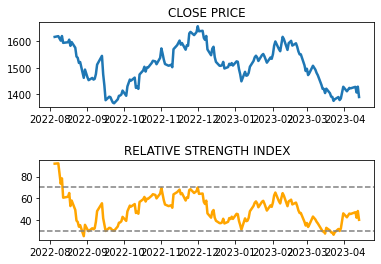

In [48]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((16,1), (10,0), rowspan = 6, colspan = 1)
ax1.plot(data['Close'], linewidth = 2.5)
ax1.set_title('CLOSE PRICE')
ax2.plot(data['RSI_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('RELATIVE STRENGTH INDEX')
plt.show()

In [49]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            

buy_price, sell_price, rsi_signal = implement_rsi_strategy(data['Close'], data['RSI_14'])

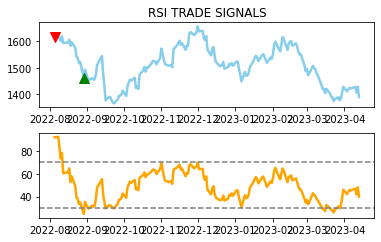

In [50]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(data['Close'], linewidth = 2.5, color = 'skyblue', label = 'Stock')
ax1.plot(data.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(data.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('RSI TRADE SIGNALS')
ax2.plot(data['RSI_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()

In [51]:
position = []
for i in range(len(rsi_signal)):
    if rsi_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(data['Close'])):
    if rsi_signal[i] == 1:
        position[i] = 1
    elif rsi_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
rsi = data['RSI_14']
close_price = data['Close']
rsi_signal = pd.DataFrame(rsi_signal).rename(columns = {0:'rsi_signal'}).set_index(data.index)
position = pd.DataFrame(position).rename(columns = {0:'rsi_position'}).set_index(data.index)

frames = [close_price, rsi, rsi_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.head()

,Close,RSI_14,rsi_signal,rsi_position
Date,,,,
2022-08-05,1616.650024,91.884562,-1,0
2022-08-08,1619.400024,92.198887,0,0
2022-08-10,1602.449951,73.342906,0,0
2022-08-11,1619.949951,78.281511,0,0
2022-08-12,1594.099976,60.462478,0,0


In [53]:
stock_ret = pd.DataFrame(np.diff(data['Close'])).rename(columns = {0:'Returns'})
rsi_strategy_ret = []

for i in range(len(stock_ret)):
    returns = stock_ret['Returns'][i]*strategy['rsi_position'][i]
    rsi_strategy_ret.append(returns)
    
rsi_strategy_ret_df = pd.DataFrame(rsi_strategy_ret).rename(columns = {0:'rsi_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/data['Close'][-1])
rsi_investment_ret = []

for i in range(len(rsi_strategy_ret_df['rsi_returns'])):
    returns = number_of_stocks*rsi_strategy_ret_df['rsi_returns'][i]
    rsi_investment_ret.append(returns)

rsi_investment_ret_df = pd.DataFrame(rsi_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(rsi_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the RSI strategy by investing 100k in INFOSYS : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the RSI strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the RSI strategy by investing 100k in INFOSYS : -5151.05
Profit percentage of the RSI strategy : -6%
